In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 1. Úloha

Na základě využití jasové korekce odstraňte z obrázků cv04_f01.bmp
a cv04_f02.bmp poruchy cv04_e01.bmp a cv04_e02.bmp. c = 255

In [42]:
def remove_shade(shaded_image_path, shade_image_path):
    # Read the shaded image and shade image
    image = cv2.imread(shaded_image_path)
    etalon = cv2.imread(shade_image_path)

    # Ensure the images have the same dimensions
    if image.shape != etalon.shape:
        raise ValueError("The shaded and shade images must have the same dimensions.")

    # Perform shade removal using brightness correction
    result = np.zeros_like(image, dtype=np.uint8)
    c = 255.0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for d in range(image.shape[2]):
                if etalon[y, x, d] != 0:  # Check if the denominator is not zero
                    result[y, x, d] = int((c * image[y, x, d]) / etalon[y, x, d])
                else:
                    # Handle division by zero (e.g., set result to 0 or 255)
                    result[y, x, d] = 255  # Set result to 255 for example

    # Concatenate the original image, shade image, and corrected image
    output = np.concatenate((image, etalon, result), axis=1)

    return output

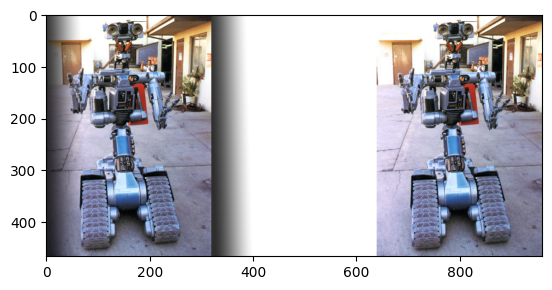

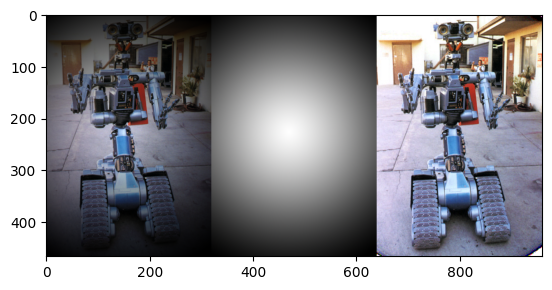

In [43]:
# cv04_f02.bmp poruchy cv04_e01.bmp a cv04_e02.bmp. c = 255.

img1 = './ims/cv04_f01.bmp'
fault = './ims/cv04_e01.bmp'

img_correct = remove_shade(img1, fault)

plt.imshow(cv2.cvtColor(img_correct, cv2.COLOR_BGR2RGB))
plt.show()

img2 = './ims/cv04_f02.bmp'
fault2 = './ims/cv04_e02.bmp'

img_correct2 = remove_shade(img2, fault2)

# show the images
plt.imshow(cv2.cvtColor(img_correct2, cv2.COLOR_BGR2RGB))
plt.show()

# 2. Úloha
ekvalizace histogramu

In [53]:
def histogram_equalization_custom(image):
    #image = cv2.imread("./ims/cv04_rentgen.bmp")
    equalized = image.copy()
    
    # Compute histogram
    histogram, _ = np.histogram(image[:,:,0].ravel(), bins=256, range=[0,256])
    
    # Find minimum non-zero intensity value and maximum intensity value
    q0 = 0
    lowest_intensity = 0
    max_intensity = 255
    
    width = image.shape[0]
    height = image.shape[1]
    
    for y in (range(0, width)):
        for x in range(0, height):
            intensity = image[y, x, 0]
            cumulative_intensity = np.sum(histogram[lowest_intensity:intensity+1])
            equalized[y, x] = (max_intensity / (width * height)) * cumulative_intensity
    
    return np.concatenate((image, equalized), axis=1)

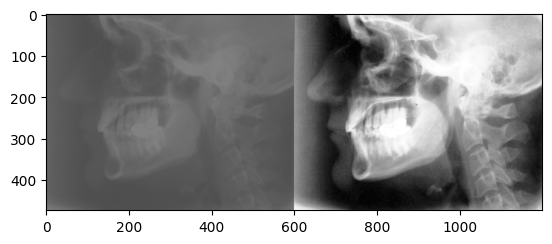

In [54]:
# Load the image
img = cv2.imread('./ims/cv04_rentgen.bmp')

# Perform histogram equalization
equalized_img = histogram_equalization_custom(img)

# plot output

plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.show()

# 3. Úloha
Z obrázku cv04c_robotC.bmp spočítejte 2D DFT (fft2 =
np.fft.fft2(gray)) a zobrazte amplitudové spektrum, upravte kvadranty
spektra, aby se nízké frekvence nacházely ve středu (vytvořte si pro tyto
účely funkci)



In [55]:
def shift_spectrum(spectrum):
    # Shift the spectrum so that the zero frequency component is at the center
    return np.fft.fftshift(spectrum)

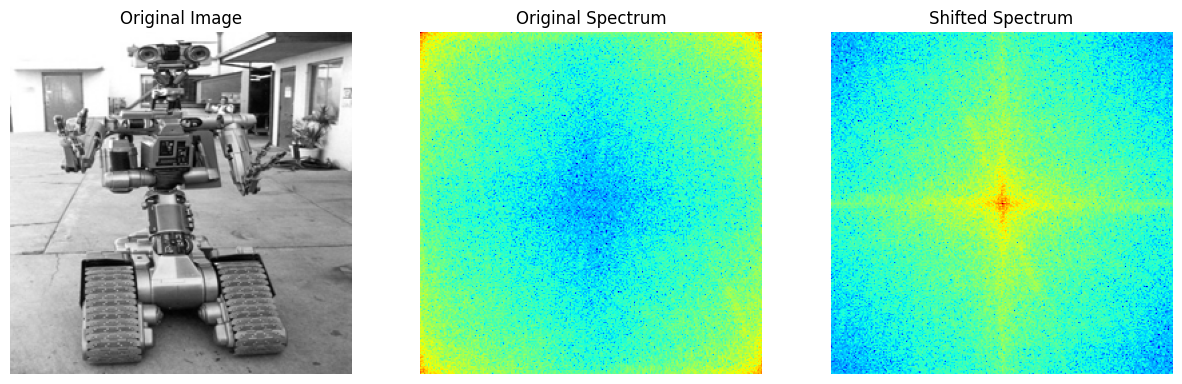

In [62]:
# Load the image
img = cv2.imread('./ims/cv04c_robotC.bmp', cv2.IMREAD_GRAYSCALE)

# Perform 2D DFT
spectrum = np.fft.fft2(img)

# Shift the spectrum
shifted_spectrum = shift_spectrum(spectrum)
    



# plot the original image, originial spectrum, and shifted spectrum
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(np.log(1 + np.abs(spectrum)), cmap='jet')
ax[1].set_title('Original Spectrum')
ax[1].axis('off')

ax[2].imshow(np.log(1 + np.abs(shifted_spectrum)), cmap='jet')
ax[2].set_title('Shifted Spectrum')
ax[2].axis('off')
plt.show()

#


# 4. Úloha

Filtrujte obraz pomocí filtrů DP, HP, jako masky použijte obrázky
cv04c_filtHP.bmp, cv04c_filtHP1.bmp, cv04c_filtDP.bmp,
cv04c_filtDP1.bmp. Obrázky si upravte jako matice s hodnotami 0, 1.
Výsledky zobrazte spolu se spektrem.
Úvod do zpracování obrazu Cvičení č.4
Josef Chaloupka, ITE, FM, TUL

In [88]:
def filter_image(image, filter_mask):
    # Perform 2D DFT
    spectrum = np.fft.fft2(image)
    
    # Shift the spectrum
    shifted_spectrum = shift_spectrum(spectrum)
    
    # Apply the filter mask to the shifted spectrum
    filtered_spectrum = shifted_spectrum * filter_mask
    
    # Perform inverse 2D DFT
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum))
    
    # Compute the magnitude of the filtered image
    magnitude = np.abs(filtered_image)
    
    return magnitude

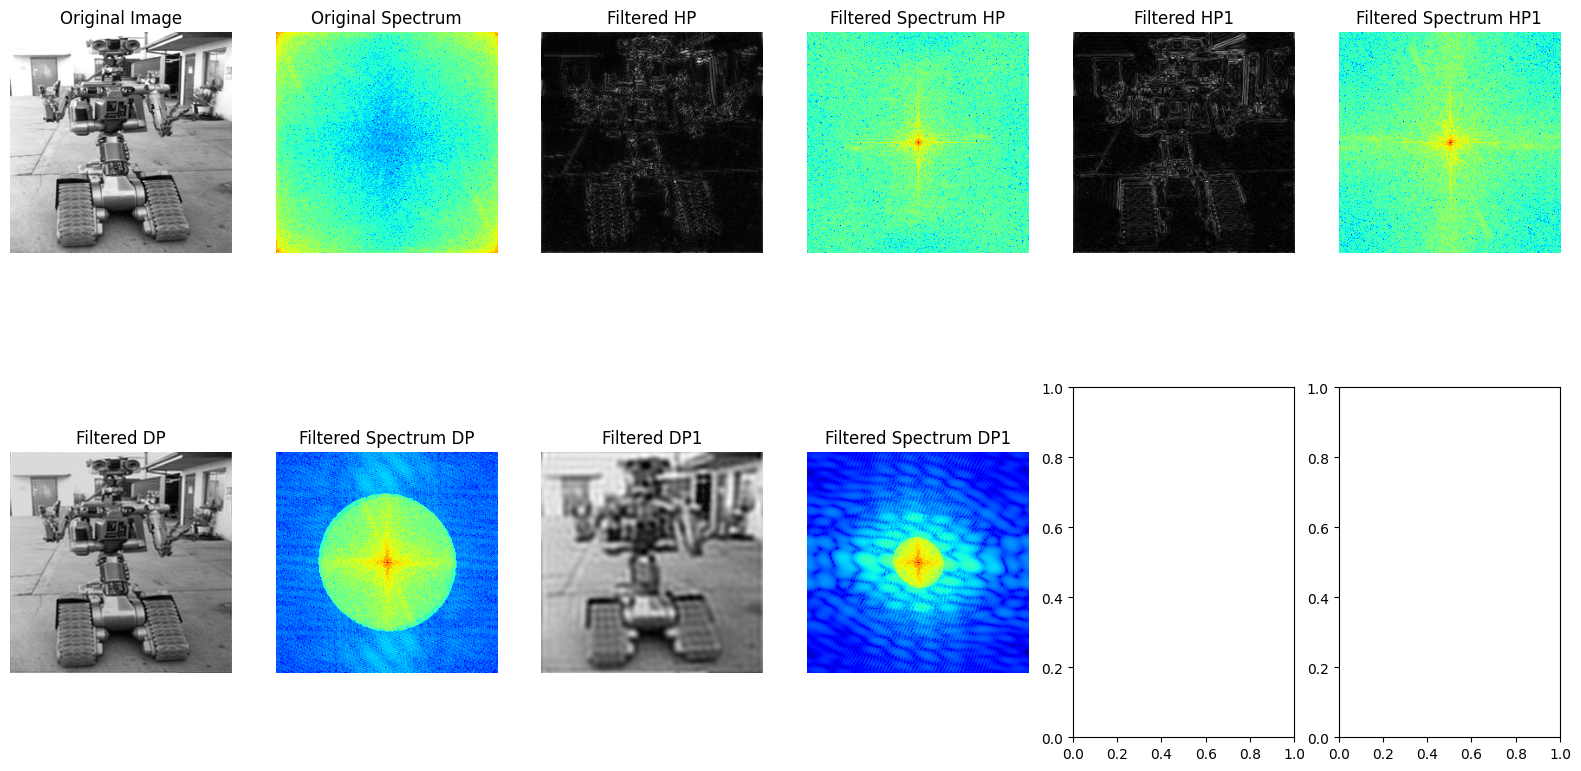

In [102]:
# Load the image
img = cv2.imread('./ims/cv04c_robotC.bmp', cv2.IMREAD_GRAYSCALE)

# Load the filter masks
filter_hp = cv2.imread('./ims/cv04c_filtHP.bmp', cv2.IMREAD_GRAYSCALE)
filter_hp1 = cv2.imread('./ims/cv04c_filtHP1.bmp', cv2.IMREAD_GRAYSCALE)
filter_dp = cv2.imread('./ims/cv04c_filtDP.bmp', cv2.IMREAD_GRAYSCALE)
filter_dp1 = cv2.imread('./ims/cv04c_filtDP1.bmp', cv2.IMREAD_GRAYSCALE)

# Convert the filter masks to binary
_, filter_hp = cv2.threshold(filter_hp, 0, 1, cv2.THRESH_BINARY)
_, filter_hp1 = cv2.threshold(filter_hp1, 0, 1, cv2.THRESH_BINARY)
_, filter_dp = cv2.threshold(filter_dp, 0, 1, cv2.THRESH_BINARY)
_, filter_dp1 = cv2.threshold(filter_dp1, 0, 1, cv2.THRESH_BINARY)

# Filter the image using the filter masks
filtered_hp = filter_image(img, filter_hp)
filtered_hp1 = filter_image(img, filter_hp1)
filtered_dp = filter_image(img, filter_dp)
filtered_dp1 = filter_image(img, filter_dp1)

# Compute the spectrums of filtered images
spectrum = np.fft.fft2(img)
spectrum_hp = np.log(np.abs(np.fft.fftshift(np.fft.fft2(filtered_hp)))) # TODO
spectrum_hp1 = np.fft.fftshift(np.fft.fft2(filtered_hp1))
spectrum_dp = np.fft.fftshift(np.fft.fft2(filtered_dp))
spectrum_dp1 = np.fft.fftshift(np.fft.fft2(filtered_dp1))


# Plot the original image, original spectrum, filtered images, and filter masks spectrums
fig2, ax = plt.subplots(2, 6, figsize=(20, 10))

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(np.log(1 + np.abs(spectrum)), cmap='jet')
ax[0, 1].set_title('Original Spectrum')
ax[0, 1].axis('off')

ax[0, 2].imshow(filtered_hp, cmap='gray')
ax[0, 2].set_title('Filtered HP')
ax[0, 2].axis('off')

ax[0, 3].imshow(np.log(1 + np.abs(spectrum_hp)), cmap='jet')
ax[0, 3].set_title('Filtered Spectrum HP')
ax[0, 3].axis('off')

ax[0, 4].imshow(filtered_hp1, cmap='gray')
ax[0, 4].set_title('Filtered HP1')
ax[0, 4].axis('off')

ax[0, 5].imshow(np.log(1 + np.abs(spectrum_hp1)), cmap='jet')
ax[0, 5].set_title('Filtered Spectrum HP1')
ax[0, 5].axis('off')

ax[1, 0].imshow(filtered_dp, cmap='gray')
ax[1, 0].set_title('Filtered DP')
ax[1, 0].axis('off')

ax[1, 1].imshow(np.log(1 + np.abs(spectrum_dp)), cmap='jet')
ax[1, 1].set_title('Filtered Spectrum DP')
ax[1, 1].axis('off')

ax[1, 2].imshow(filtered_dp1, cmap='gray')
ax[1, 2].set_title('Filtered DP1')
ax[1, 2].axis('off')

ax[1, 3].imshow(np.log(1 + np.abs(spectrum_dp1)), cmap='jet')
ax[1, 3].set_title('Filtered Spectrum DP1')
ax[1, 3].axis('off')





# plot the second filter
plt.show()
